<br>

***

# <span style="color:#0070C0;font-size:45px"><b>Week 2</b></span>
<!-- # <span style="color:#0070C0;font-size:35px"><b>Title</b></span> -->
<!-- # <span style="color:#0070C0">H1</span> -->
<!-- ## <span style="color:#2A9FC4">H2</span> -->
<!-- ### <span style="color:#44AA57">H3</span> -->

<span style="color:#8c8c8c">Patrick Weatherford</span>

[Dark Blue]: <> (#0070C0)
[Light Blue]: <> (#2A9FC4)
[Earth Green]: <> (#44AA57)
[Grey]: <> (#8c8c8c)

<br>

***

<!-- # <span style="color:#0070C0;font-size:35px"><b>Week 2</b></span> -->
<!-- # <span style="color:#0070C0;font-size:35px"><b>Title</b></span> -->
<!-- # <span style="color:#0070C0">H1</span> -->
<!-- ## <span style="color:#2A9FC4">H2</span> -->
<!-- ### <span style="color:#44AA57">H3</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Dark Blue]: <> (#0070C0)
[Light Blue]: <> (#2A9FC4)
[Earth Green]: <> (#44AA57)
[Grey]: <> (#8c8c8c)

For this weeks assignment, I chose a dataset from Kaggle where participants in a study where rated on various personality traits. The participants then were asked to rate 12 movies that had common personality themes.

Dataset: `https://www.kaggle.com/datasets/arslanali4343/top-personality-dataset`

<br>

***

# <span style="color:#0070C0">Import Libraries</span>
<!-- # <span style="color:#0070C0;font-size:40px"><b>Title</b></span> -->
<!-- # <span style="color:#0070C0">H1</span> -->
<!-- ## <span style="color:#2A9FC4">H2</span> -->
<!-- ### <span style="color:#44AA57">H3</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Dark Blue]: <> (#0070C0)
[Light Blue]: <> (#2A9FC4)
[Earth Green]: <> (#44AA57)
[Grey]: <> (#8c8c8c)

Custom module on github: https://github.com/Hakuna-Patata/BU_MSDS_PTW/blob/main/Python/HakunaPatata.py

In [ ]:
import os
import sys

home_path = f"C:{os.environ['HOMEPATH']}"
bu_path = f"{home_path}\\OneDrive - Bellevue University\\Bellevue_University"

custom_mod_path = f"{bu_path}\\Python\\Custom_Modules".replace('\\', '/')

sys.path.append(custom_mod_path)

import api_keys
import hakuna_patata

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
from zipfile import ZipFile

%matplotlib inline

# matplotlib default settings
plt.style.use('dark_background')
mpl.rcParams.update({'lines.linewidth': 3})
mpl.rcParams.update({'axes.labelsize': 14})
mpl.rcParams.update({'axes.titlesize': 16})
mpl.rcParams.update({'axes.titleweight': 'bold'})
mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams.update(
    {'axes.grid': True, 'grid.color': '#424242', 'grid.linestyle': '--'})

# creation random number generator object
rng_seed = 777
rng = np.random.default_rng(rng_seed)

# pandas dataframe options
pd.set_option('display.max_columns', None)


<br>

***

# <span style="color:#0070C0">Load Dataset into DataFrame</span>
<!-- # <span style="color:#0070C0;font-size:40px"><b>Title</b></span> -->
<!-- # <span style="color:#0070C0">H1</span> -->
<!-- ## <span style="color:#2A9FC4">H2</span> -->
<!-- ### <span style="color:#44AA57">H3</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Dark Blue]: <> (#0070C0)
[Light Blue]: <> (#2A9FC4)
[Earth Green]: <> (#44AA57)
[Grey]: <> (#8c8c8c)

Using custom module which is based on kaggle python package. Create kaggle API object.

In [ ]:
k_username = api_keys.Kaggle_API['username']
k_api_key = api_keys.Kaggle_API['key']

k_api = hakuna_patata.kaggle_api(k_username, k_api_key)


In [ ]:
dataset = 'arslanali4343/top-personality-dataset'
download_path = f"{bu_path}\\DSC 550 - Data Mining\\Data"
rename = r'2018 Top Personality Data'

hakuna_patata.kaggle_dataset_download(kaggle_api=k_api, dataset=dataset, download_path=download_path, rename=rename)


100%|██████████| 9.46M/9.46M [00:00<00:00, 40.2MB/s]

Download and rename succesful! File path below:
C:\Users\patwea\OneDrive - Bellevue University\Bellevue_University\DSC 550 - Data Mining\Data\2018 Top Personality Data.zip


File(s) downloaded as .zip file. Using the `zipfile` package I can import into DataFrame without extracting the .zip file.

In [ ]:
file_path = r"C:\Users\patwea\OneDrive - Bellevue University\Bellevue_University\DSC 550 - Data Mining\Data\2018 Top Personality Data.zip"

zip_df_dict = {}
with ZipFile(file_path) as zip_file:
    for file in zip_file.namelist():
        data = zip_file.open(file)
        df = pd.read_csv(data)
        zip_df_dict[file] = df

for k, v in zip_df_dict.items():
    print(f"{k} : {type(v)}")


2018-personality-data.csv : <class 'pandas.core.frame.DataFrame'>
2018_ratings.csv : <class 'pandas.core.frame.DataFrame'>


<br>

***

# <span style="color:#0070C0">Dataset Report Definitions</span>
<!-- # <span style="color:#0070C0;font-size:40px"><b>Title</b></span> -->
<!-- # <span style="color:#0070C0">H1</span> -->
<!-- ## <span style="color:#2A9FC4">H2</span> -->
<!-- ### <span style="color:#44AA57">H3</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Dark Blue]: <> (#0070C0)
[Light Blue]: <> (#2A9FC4)
[Earth Green]: <> (#44AA57)
[Grey]: <> (#8c8c8c)

Columns below are assessment scores from 1(low)-7(high) for various personality traits.
- openness
- agreeableness
- emotional_stability
- conscientiousness
- extraversion

<u>Assigned Metric</u>: For the 12 moves rated by the user, the theme associated with the movies rated.
- serendipity
- popularity
- diversity
- default

<u>Assigned Condition</u>: For the assigned metric above, the intensity of the trait theme for the 12 movies rated.
- low
- medium
- high

<br>

***

# <span style="color:#0070C0">Clean Dataset</span>
<!-- # <span style="color:#0070C0;font-size:40px"><b>Title</b></span> -->
<!-- # <span style="color:#0070C0">H1</span> -->
<!-- ## <span style="color:#2A9FC4">H2</span> -->
<!-- ### <span style="color:#44AA57">H3</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Dark Blue]: <> (#0070C0)
[Light Blue]: <> (#2A9FC4)
[Earth Green]: <> (#44AA57)
[Grey]: <> (#8c8c8c)

Preview dataset

In [ ]:
personality_df = zip_df_dict['2018-personality-data.csv']
personality_df


,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,95858,4.271995,115713,4.611922,26674,4.459407,93040,4.147292,117533,4.098206,108979,4.064843,112582,4.149100,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,1247,4.266540,953,4.211322,2010,4.408341,1234,4.090358,5291,4.202424,106642,4.113912,1209,4.094422,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,77658,4.710444,101895,5.029360,1260,4.698602,5971,4.660769,98491,4.962319,926,4.706864,1204,4.645191,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,108979,4.246346,33779,4.002232,96728,3.981009,77307,4.059373,111759,3.888507,7762,4.368495,26082,4.554531,89753,4.145526,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,93040,4.227140,1199,4.069527,83134,4.336292,5971,4.091813,68237,4.217929,745,4.101192,4973,4.244278,47099,4.473696,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,106173,3.935297,126397,4.006561,109710,3.947412,99171,4.003978,119194,4.002666,69483,4.235115,45691,4.191760,58530,3.965657,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,serendipity,medium,6874,4.241766,38061,4.350788,46578,4.399071,4848,4.749688,44195,4.493639,4979,4.397887,7438,4.207513,3897,4.212995,92259,4.819710,32,4.059369,3730,4.427336,3435,4.844386,4,4


Rename columns

In [ ]:
new_cols = {' agreeableness': 'AGREEABLE',
 ' assigned condition': 'ASSIGNED_COND',
 ' assigned metric': 'ASSIGNED_METRIC',
 ' conscientiousness': 'CONSCIENTIOUSNESS',
 ' emotional_stability': 'EMOTIONAL_STABILITY',
 ' enjoy_watching ': 'ENJOY_WATCHING',
 ' extraversion': 'EXTRAVERSION',
 ' is_personalized': 'IS_PERSONALIZED',
 ' movie_1': 'MOVIE_1',
 ' movie_10': 'MOVIE_10',
 ' movie_11': 'MOVIE_11',
 ' movie_12': 'MOVIE_12',
 ' movie_2': 'MOVIE_2',
 ' movie_3': 'MOVIE_3',
 ' movie_4': 'MOVIE_4',
 ' movie_5': 'MOVIE_5',
 ' movie_6': 'MOVIE_6',
 ' movie_7': 'MOVIE_7',
 ' movie_8': 'MOVIE_8',
 ' movie_9': 'MOVIE_9',
 ' openness': 'OPENNESS',
 ' predicted_rating_1': 'MOVIE_1_PRED',
 ' predicted_rating_10': 'MOVIE_10_PRED',
 ' predicted_rating_11': 'MOVIE_11_PRED',
 ' predicted_rating_12': 'MOVIE_12_PRED',
 ' predicted_rating_2': 'MOVIE_2_PRED',
 ' predicted_rating_3': 'MOVIE_3_PRED',
 ' predicted_rating_4': 'MOVIE_4_PRED',
 ' predicted_rating_5': 'MOVIE_5_PRED',
 ' predicted_rating_6': 'MOVIE_6_PRED',
 ' predicted_rating_7': 'MOVIE_7_PRED',
 ' predicted_rating_8': 'MOVIE_8_PRED',
 ' predicted_rating_9': 'MOVIE_9_PRED',
 'userid': 'USER_ID'}

clean_personality_df = personality_df.rename(columns=new_cols)

clean_personality_df


,USER_ID,OPENNESS,AGREEABLE,EMOTIONAL_STABILITY,CONSCIENTIOUSNESS,EXTRAVERSION,ASSIGNED_METRIC,ASSIGNED_COND,MOVIE_1,MOVIE_1_PRED,MOVIE_2,MOVIE_2_PRED,MOVIE_3,MOVIE_3_PRED,MOVIE_4,MOVIE_4_PRED,MOVIE_5,MOVIE_5_PRED,MOVIE_6,MOVIE_6_PRED,MOVIE_7,MOVIE_7_PRED,MOVIE_8,MOVIE_8_PRED,MOVIE_9,MOVIE_9_PRED,MOVIE_10,MOVIE_10_PRED,MOVIE_11,MOVIE_11_PRED,MOVIE_12,MOVIE_12_PRED,IS_PERSONALIZED,ENJOY_WATCHING
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,95858,4.271995,115713,4.611922,26674,4.459407,93040,4.147292,117533,4.098206,108979,4.064843,112582,4.149100,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,1247,4.266540,953,4.211322,2010,4.408341,1234,4.090358,5291,4.202424,106642,4.113912,1209,4.094422,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,77658,4.710444,101895,5.029360,1260,4.698602,5971,4.660769,98491,4.962319,926,4.706864,1204,4.645191,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,108979,4.246346,33779,4.002232,96728,3.981009,77307,4.059373,111759,3.888507,7762,4.368495,26082,4.554531,89753,4.145526,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,93040,4.227140,1199,4.069527,83134,4.336292,5971,4.091813,68237,4.217929,745,4.101192,4973,4.244278,47099,4.473696,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,106173,3.935297,126397,4.006561,109710,3.947412,99171,4.003978,119194,4.002666,69483,4.235115,45691,4.191760,58530,3.965657,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,serendipity,medium,6874,4.241766,38061,4.350788,46578,4.399071,4848,4.749688,44195,4.493639,4979,4.397887,7438,4.207513,3897,4.212995,92259,4.819710,32,4.059369,3730,4.427336,3435,4.844386,4,4


<br>

***

# <span style="color:#0070C0">Visualize Data</span>
<!-- # <span style="color:#0070C0;font-size:40px"><b>Title</b></span> -->
<!-- # <span style="color:#0070C0">H1</span> -->
<!-- ## <span style="color:#2A9FC4">H2</span> -->
<!-- ### <span style="color:#44AA57">H3</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Dark Blue]: <> (#0070C0)
[Light Blue]: <> (#2A9FC4)
[Earth Green]: <> (#44AA57)
[Grey]: <> (#8c8c8c)

<br>

<span style="color:#2A9FC4;font-size:28px">Personality Trait Distributions</span>
<!-- # <span style="color:#0070C0;font-size:40px"><b>Title</b></span> -->
<!-- # <span style="color:#0070C0">H1</span> -->
<!-- ## <span style="color:#2A9FC4;font-size:28px">H2</span> -->
<!-- ### <span style="color:#44AA57">H3</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Dark Blue]: <> (#0070C0)
[Light Blue]: <> (#2A9FC4)
[Earth Green]: <> (#44AA57)
[Grey]: <> (#8c8c8c)

How are the personality trait scores distributed in the dataset?

Text(0.5, 0, 'Personality Trait')

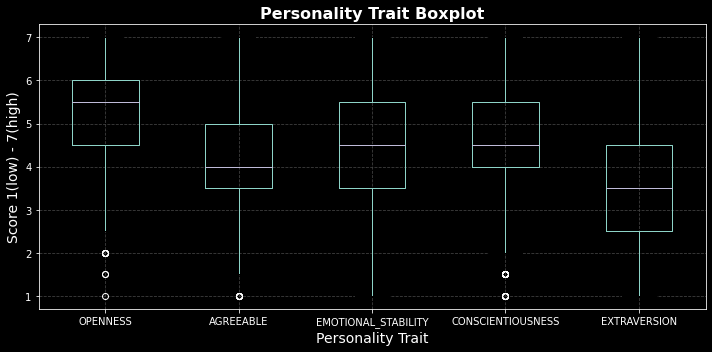

In [ ]:
plt.figure(figsize=(10,5))
clean_personality_df.boxplot(['OPENNESS','AGREEABLE','EMOTIONAL_STABILITY','CONSCIENTIOUSNESS','EXTRAVERSION'])
plt.title('Personality Trait Boxplot')
plt.ylabel('Score 1(low) - 7(high)')
plt.xlabel('Personality Trait')


From the figure above, it would seem that the scores are fairly normally distributed but further statistical testing would be needed to determine the degree of normality. It would also appear that there are a few outliers in the data that would need to be evaluated to determine how to handle them.

<br>

<br>

<span style="color:#2A9FC4;font-size:28px">Personality & Assigned Metric/Condition w/Avg. Predicted Rank</span>
<!-- # <span style="color:#0070C0;font-size:40px"><b>Title</b></span> -->
<!-- # <span style="color:#0070C0">H1</span> -->
<!-- ## <span style="color:#2A9FC4;font-size:28px">H2</span> -->
<!-- ### <span style="color:#44AA57">H3</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Dark Blue]: <> (#0070C0)
[Light Blue]: <> (#2A9FC4)
[Earth Green]: <> (#44AA57)
[Grey]: <> (#8c8c8c)

For each assigned metric/condition, graph a scatterplot which compares each personality trait with the average predicted rating for each movie in the metric/condition.

In [ ]:
movie_pred_cols = [f"MOVIE_{i}_PRED" for i in range(1,13)]
movie_id_cols = [f"MOVIE_{i}" for i in range(1,13)]

clean_personality_df['MOVIE_PRED_AVG'] = (clean_personality_df[movie_pred_cols]).mean(axis=1)  # calc. mean horizontally across movie rank predictions

avg_movie_pred_df = clean_personality_df.drop(columns=movie_pred_cols)
avg_movie_pred_df = avg_movie_pred_df.drop(columns=movie_id_cols)

avg_movie_pred_df


,USER_ID,OPENNESS,AGREEABLE,EMOTIONAL_STABILITY,CONSCIENTIOUSNESS,EXTRAVERSION,ASSIGNED_METRIC,ASSIGNED_COND,IS_PERSONALIZED,ENJOY_WATCHING,MOVIE_PRED_AVG
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,4,4,4.252363
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,2,3,4.173935
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,2,2,4.764654
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,3,3,4.444313
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2,3,4.444313
...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,3,3,4.156620
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,3,4,4.185723
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,3,4,4.015988
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,serendipity,medium,4,4,4.433679


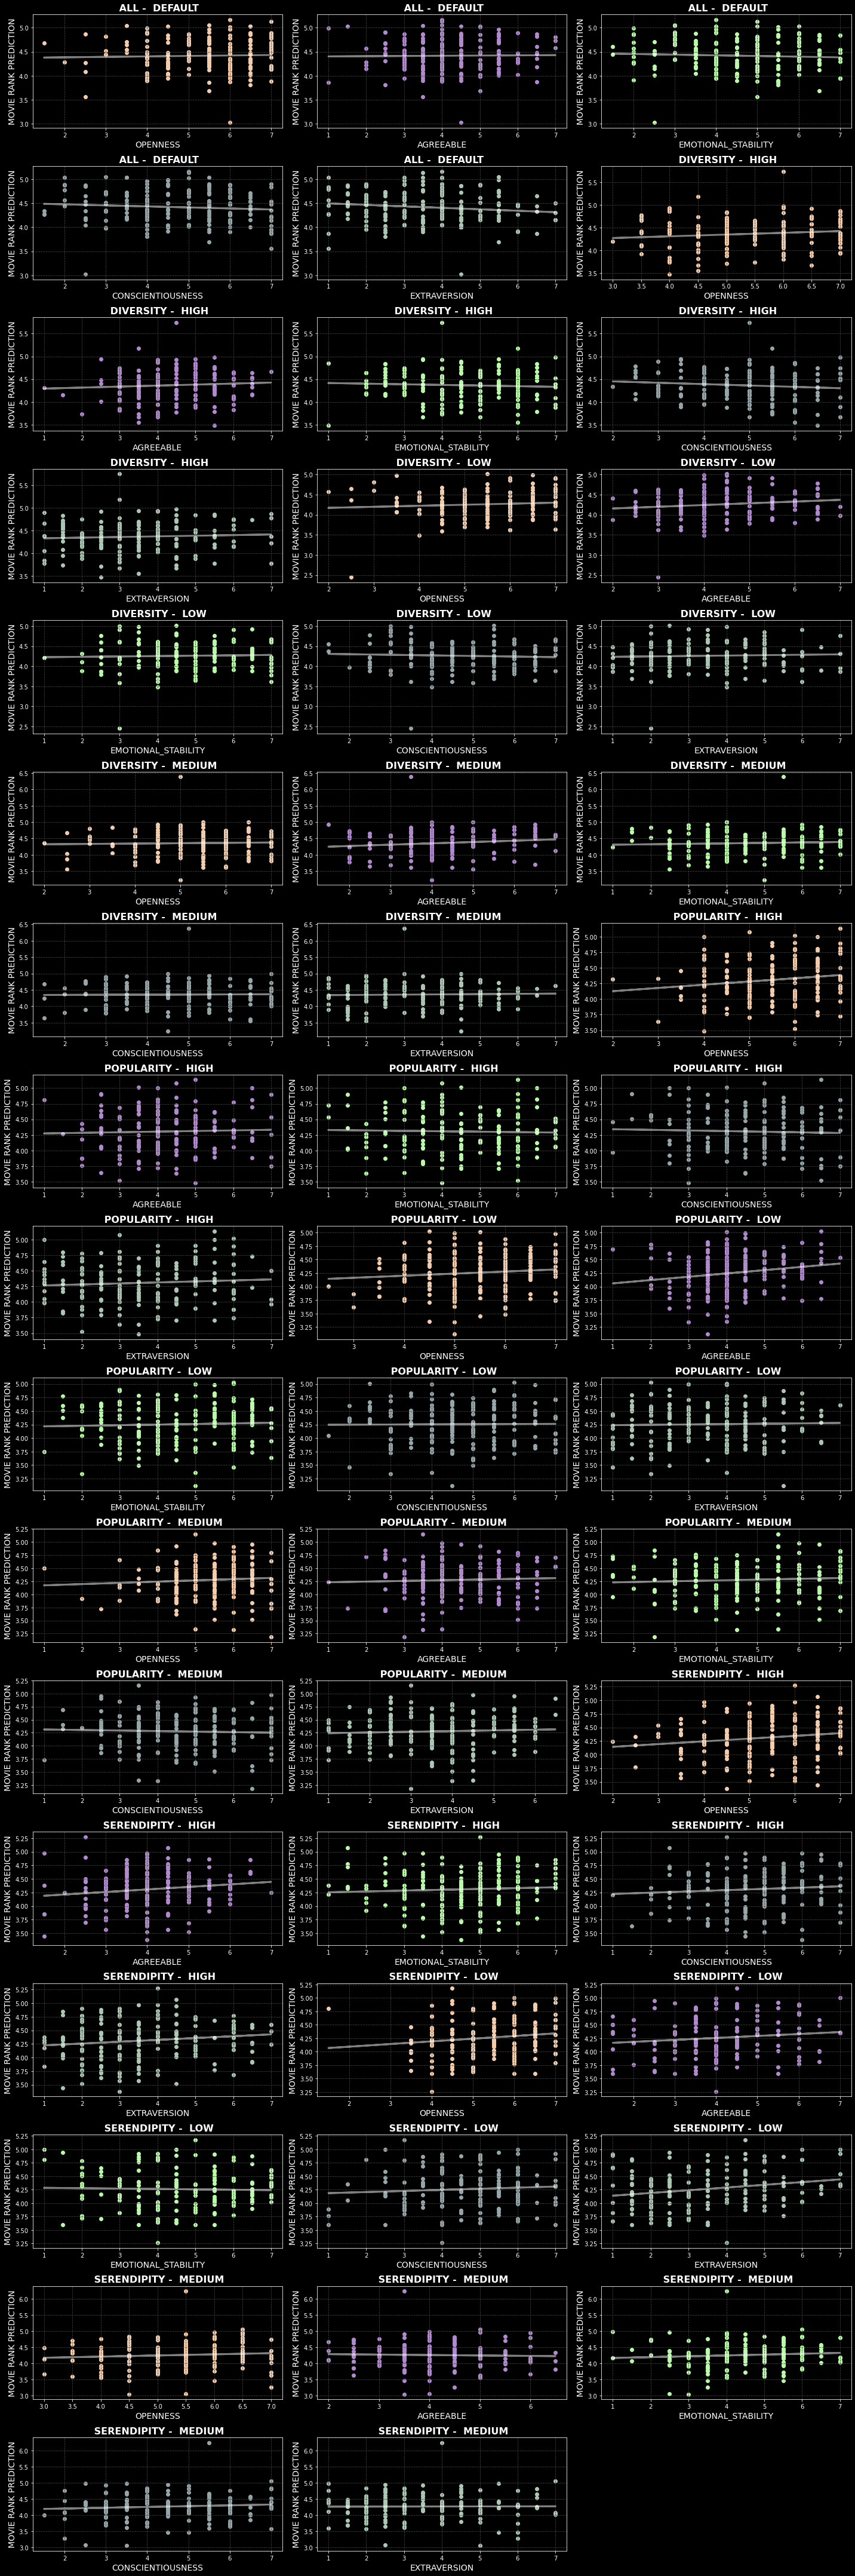

In [ ]:
metric_cond_grp = avg_movie_pred_df.sort_values(by=['ASSIGNED_METRIC','ASSIGNED_COND']).groupby(['ASSIGNED_METRIC','ASSIGNED_COND'])
trait_list = ['OPENNESS','AGREEABLE','EMOTIONAL_STABILITY','CONSCIENTIOUSNESS','EXTRAVERSION']
rand_colors = [rng.integers(50,100,3)/100 for trait in trait_list]

num_subplots = len(trait_list) * len(metric_cond_grp)
num_subplot_cols = 3
num_subplot_rows = int(np.ceil(num_subplots / num_subplot_cols))

position = range(1, num_subplots+1)

fig = plt.figure(figsize=(20,60))

fig_col = 1
color_choose = 0

for grp, df in metric_cond_grp:
    for trait in trait_list:
        ax = fig.add_subplot(num_subplot_rows, num_subplot_cols, fig_col)
        xs = df[trait]
        ys = df['MOVIE_PRED_AVG']
        ax.scatter(x=xs, y=ys, color=rand_colors[color_choose])
        m, b = np.polyfit(xs, ys, 1)
        ax.plot(xs, m*xs+b, alpha=.5, c='white')
        plt.title(f"{grp[0].upper()} - {grp[1].upper()}")
        plt.xlabel(trait)
        plt.ylabel('MOVIE RANK PREDICTION')
        fig_col+=1
        color_choose+=1
        if color_choose >= len(trait_list):
            color_choose = 0
        else:
            continue
        if fig_col > num_subplots:
            break
        else:
            continue
            

From the figures above, there seem to be some personalities that correlate with with various movie themes but overall nothing seems to stand out as a clear indicator that a particular personality trait will enjoy a certain themed movie.

<br>

<br>

<span style="color:#2A9FC4;font-size:28px">Histogram of Avg. Movie Rank Prediction</span>
<!-- # <span style="color:#0070C0;font-size:40px"><b>Title</b></span> -->
<!-- # <span style="color:#0070C0">H1</span> -->
<!-- ## <span style="color:#2A9FC4;font-size:28px">H2</span> -->
<!-- ### <span style="color:#44AA57">H3</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Dark Blue]: <> (#0070C0)
[Light Blue]: <> (#2A9FC4)
[Earth Green]: <> (#44AA57)
[Grey]: <> (#8c8c8c)

For each movie theme in the dataset, create a histogram of the mean rank.

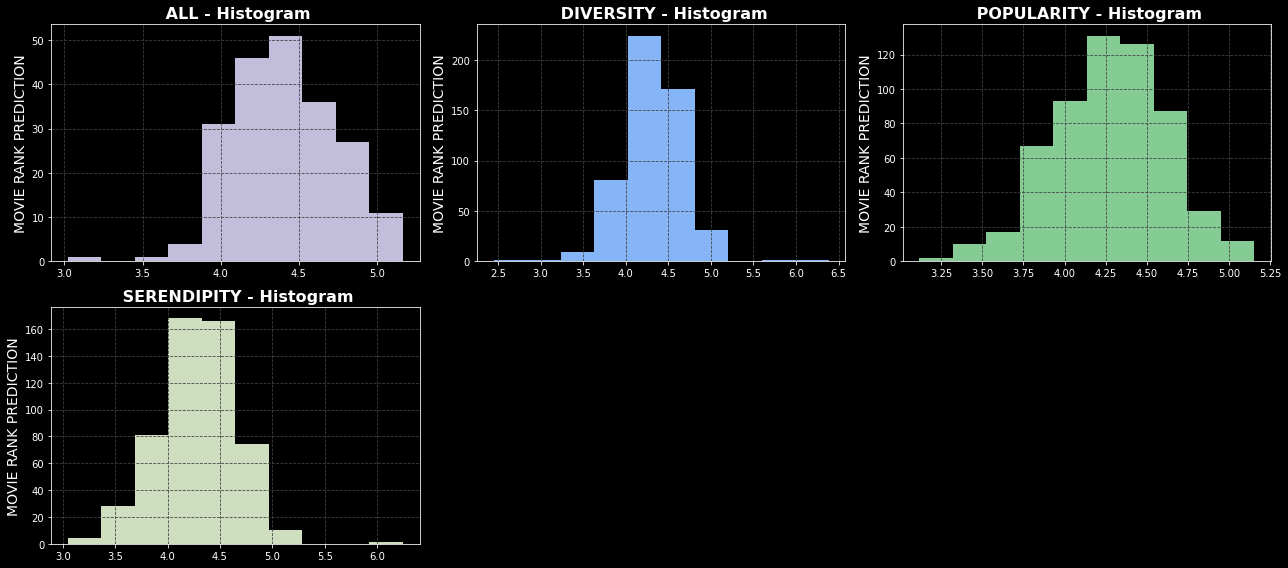

In [ ]:
metric_cond_grp2 = avg_movie_pred_df.sort_values(by=['ASSIGNED_METRIC']).groupby(['ASSIGNED_METRIC'])
rand_colors = [rng.integers(50,100,3)/100 for _ in range(0,len(metric_cond_grp2))]

num_subplots = len(metric_cond_grp2)
num_cols = 3
num_rows = int(np.ceil(num_subplots / num_cols))

fig = plt.figure(figsize=(18,8))

fig_col = 1
color_choose = 0

for grp, df in metric_cond_grp2:
    ax = fig.add_subplot(num_rows, num_cols, fig_col)
    ys = df['MOVIE_PRED_AVG']
    ax.hist(ys, color=rand_colors[color_choose])
    plt.title(f"{grp.upper()} - Histogram")
    plt.ylabel('MOVIE RANK PREDICTION')
    fig_col+=1
    color_choose+=1
    if color_choose >= len(rand_colors):
        color_choose = 0
    else:
        continue
    if fig_col > num_subplots:
        break
    else:
        continue

From the figures above:
- <u>ALL</u>: seems negatively skewed.
- <u>DIVERSITY</u>: seems to have positive kurtosis.
- <u>POPULARITY</u>: seems normally distributed.
- <u>SERENDIPITY</u>: seems positively skewed.

<br>

***

# <span style="color:#0070C0">References</span>
<!-- # <span style="color:#0070C0;font-size:40px"><b>Title</b></span> -->
<!-- # <span style="color:#0070C0">H1</span> -->
<!-- ## <span style="color:#2A9FC4">H2</span> -->
<!-- ### <span style="color:#44AA57">H3</span> -->

<!-- <span style="color:#8c8c8c">Patrick Weatherford</span> -->

[Dark Blue]: <> (#0070C0)
[Light Blue]: <> (#2A9FC4)
[Earth Green]: <> (#44AA57)
[Grey]: <> (#8c8c8c)

Ali, A. (2020). Top Personality Dataset. Retrieved June 16, 2022, from Kaggle.com website: https://www.kaggle.com/datasets/arslanali4343/top-personality-dataset
